# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `3` | `RE`view

> "Hi Team! 👋

> Here we go again! The current script is prepared to help you to further exercise course content (But, again, do note that these are not assessment questions. They are for your exercise.)

> Some of the questions ask you to perform `reverse-engineering` 🧩. Instead of a question written in text format, you will be given the end results of some lines of code. Your task is to fill in the input cell with lines of code to create the output cell. Such a reverse-engineering exercise in computational programming will maximize your knowledge and skills in Computational Finance. 

> The questions below won’t be that difficult, as you have learned how to answer them from the lessons and the assigned readings. As you will notice from the questions, my intention is not just to give questions, but also to give additional learning pointers. I hope this helps 😊

> Enjoy!

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings("ignore")

### Let's try to import historical stock data from the web and from your machine.

#### How to import from the Web

> You need to have `pandas_datareader` and `yfinance` module.

In [2]:
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

> Let's start & end dates--we are interested in year 2023 until August.

In [3]:
start = datetime.datetime(2023, 1, 2)
end = datetime.datetime(2023, 8, 31)

> Then, let's use [Yahoo! Finance](https://sg.finance.yahoo.com/) for extracting historical stock data.

In [4]:
apple =\
(    web
     .get_data_yahoo("AAPL", 
                     start, 
                     end)
)

google =\
(    web
     .get_data_yahoo("GOOGL", 
                     start, 
                     end)
)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


> You may save the data to csv files.

In [5]:
apple.to_csv("apple_2023_stock.csv")
google.to_csv("google_2023_stock.csv")

> Let's read the stored files.

In [6]:
apple_2023 =\
(pd
 .read_csv("apple_2023_stock.csv",
           index_col = 0,
           parse_dates = True)
)

google_2023 =\
(pd
 .read_csv("google_2023_stock.csv", 
           index_col = 0, 
           parse_dates = True)
)

#### Have a quick look at your data.

In [7]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800


In [8]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [9]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02
mean,166.993555,168.662289,165.748073,167.331205,166.976434,6.066744e+07
std,18.429099,18.195184,18.451313,18.227959,18.348918,1.815773e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,152.405006,154.277496,150.852505,152.899998,152.482891,4.849780e+07
50%,169.389999,170.400002,167.709999,169.064995,168.603798,5.586760e+07
75%,181.210003,182.905003,179.082497,180.957504,180.713474,6.777278e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.543573e+08


In [10]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02
mean,110.625181,112.190723,109.509759,110.915843,110.915843,3.517107e+07
std,14.212845,14.274273,14.131140,14.109641,14.109641,1.380574e+07
min,85.980003,87.570000,84.860001,86.199997,86.199997,1.446790e+07
25%,97.597502,100.032499,96.914999,98.972498,98.972498,2.670200e+07
50%,106.864998,108.084999,105.385002,107.614998,107.614998,3.156025e+07
75%,123.129999,124.792501,122.135000,123.517500,123.517500,3.751230e+07
max,134.779999,136.570007,134.070007,135.880005,135.880005,1.194550e+08


### We will `re-organize` and `re-shape` stock data

> Let's concatenate data in multiple DataFrame objects

In [11]:
apple_07 =\
(
    apple
    .loc["2023-07"]
    [["Adj Close"]]
)

In [12]:
apple_08 =\
(
    apple
    .loc["2023-08"]
    [["Adj Close"]]
)

> Let's obtain Apple adjusted close data for July and August 2022

In [13]:
apple_07.head()

,Adj Close
Date,
2023-07-03,192.200470
2023-07-05,191.071976
2023-07-06,191.551331
2023-07-07,190.422852
2023-07-10,188.355652


In [14]:
apple_08.head()

,Adj Close
Date,
2023-08-01,195.346207
2023-08-02,192.320297
2023-08-03,190.912201
2023-08-04,181.744583
2023-08-07,178.608810


### Question 1-1. Please combine the first three rows of each of `apple_07` and `apple_08`

In [15]:
pd \
    .concat([apple_07.iloc[ :3], apple_08.iloc[ :3]
            ]
           )

,Adj Close
Date,
2023-07-03,192.200470
2023-07-05,191.071976
2023-07-06,191.551331
2023-08-01,195.346207
2023-08-02,192.320297
2023-08-03,190.912201


#### Question 1-2. How would you extract only the 2023 August GOOGL values?

In [16]:
# google \
# ["2023-08"] \
# [["Adj Close"]]

In [17]:
google_aug =\
    google \
    .loc[google
         .index
         .month 
         == 8]

In [18]:
google_aug

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,130.779999,132.630005,130.679993,131.550003,131.550003,23166800
2023-08-02,129.449997,130.089996,127.559998,128.380005,128.380005,26273300
2023-08-03,127.970001,129.389999,127.419998,128.449997,128.449997,20089500
2023-08-04,129.279999,131.509995,127.910004,128.110001,128.110001,26130000
2023-08-07,129.160004,131.610001,129.020004,131.529999,131.529999,22746300
2023-08-08,130.619995,131.509995,129.539993,131.399994,131.399994,23535200
2023-08-09,131.660004,132.039993,129.000000,129.660004,129.660004,24912900
2023-08-10,131.320007,132.050003,129.449997,129.690002,129.690002,20857800
2023-08-11,128.660004,129.929993,128.169998,129.559998,129.559998,19569200


#### Question 1-3. Please concatenate the AAPL and GOOGL 2023 August stock data--there will be duplicate index labels

In [19]:
apple_aug =\
    apple \
    .loc[apple
        .index
        .month == 8]

In [20]:
apple_aug

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.346207,35175100
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.320297,50389300
2023-08-03,191.570007,192.369995,190.690002,191.169998,190.912201,61235200
2023-08-04,185.520004,187.380005,181.919998,181.990005,181.744583,115799700
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100
2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500
2023-08-10,179.479996,180.750000,177.600006,177.970001,177.729996,54686900
2023-08-11,177.320007,178.619995,176.550003,177.789993,177.789993,51988100


In [21]:
pd \
    .concat([apple_aug.iloc[ :3],
             google_aug.iloc[ :3]
            ]
           ) \
    [["Adj Close"]]

,Adj Close
Date,
2023-08-01,195.346207
2023-08-02,192.320297
2023-08-03,190.912201
2023-08-01,131.550003
2023-08-02,128.380005
2023-08-03,128.449997


> Let's see the `two records for data of 2023-08-03`

In [22]:
concat_aug =\
    pd \
    .concat([apple_aug.iloc[ :3],
             google_aug.iloc[ :3]
            ]
           )

concat_aug \
    .loc[pd.Timestamp(2023, 8, 3), ["Adj Close"]
        ]

,Adj Close
Date,
2023-08-03,190.912201
2023-08-03,128.449997


#### Question 1-4. Please concatenate to show a specification of the stock tickets being part of the index. This will help disambiguate the duplicate dates using a hierarchal index.

In [23]:
MI_apple =\
    pd \
    .MultiIndex \
    .from_product([["AAPL"], apple.index.to_list()
                  ]
                 )

MI_apple

MultiIndex([('AAPL', '2023-01-03'),
            ('AAPL', '2023-01-04'),
            ('AAPL', '2023-01-05'),
            ('AAPL', '2023-01-06'),
            ('AAPL', '2023-01-09'),
            ('AAPL', '2023-01-10'),
            ('AAPL', '2023-01-11'),
            ('AAPL', '2023-01-12'),
            ('AAPL', '2023-01-13'),
            ('AAPL', '2023-01-17'),
            ...
            ('AAPL', '2023-08-17'),
            ('AAPL', '2023-08-18'),
            ('AAPL', '2023-08-21'),
            ('AAPL', '2023-08-22'),
            ('AAPL', '2023-08-23'),
            ('AAPL', '2023-08-24'),
            ('AAPL', '2023-08-25'),
            ('AAPL', '2023-08-28'),
            ('AAPL', '2023-08-29'),
            ('AAPL', '2023-08-30')],
           length=166)

In [24]:
apple.index = MI_apple
apple

Open        High         Low       Close   Adj Close  \
AAPL 2023-01-03  130.279999  130.899994  124.169998  125.070000  124.538658   
     2023-01-04  126.889999  128.660004  125.080002  126.360001  125.823189   
     2023-01-05  127.129997  127.769997  124.760002  125.019997  124.488869   
     2023-01-06  126.010002  130.289993  124.889999  129.619995  129.069336   
     2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597076   
...                     ...         ...         ...         ...         ...   
     2023-08-24  180.669998  181.100006  176.009995  176.380005  176.380005   
     2023-08-25  177.380005  179.149994  175.820007  178.610001  178.610001   
     2023-08-28  180.089996  180.589996  178.550003  180.190002  180.190002   
     2023-08-29  179.699997  184.899994  179.500000  184.119995  184.119995   
     2023-08-30  184.940002  187.850006  184.740005  187.649994  187.649994   

                    Volume  
AAPL 2023-01-03  112117500  
     2023-01-04   89113600  
     2023-01-05   80962700  
     2023-01-06   87754700  
     2023-01-09   70790800  
...                    ...  
     2023-08-24   54945800  
     2023-08-25   51449600  
     2023-08-28   43820700  
     2023-08-29   53003900  
     2023-08-30   60813900  

[166 rows x 6 columns]

In [25]:
MI_google =\
    pd \
    .MultiIndex \
    .from_product([["Google"], google.index.to_list()
                  ]
                 )

MI_google

MultiIndex([('Google', '2023-01-03'),
            ('Google', '2023-01-04'),
            ('Google', '2023-01-05'),
            ('Google', '2023-01-06'),
            ('Google', '2023-01-09'),
            ('Google', '2023-01-10'),
            ('Google', '2023-01-11'),
            ('Google', '2023-01-12'),
            ('Google', '2023-01-13'),
            ('Google', '2023-01-17'),
            ...
            ('Google', '2023-08-17'),
            ('Google', '2023-08-18'),
            ('Google', '2023-08-21'),
            ('Google', '2023-08-22'),
            ('Google', '2023-08-23'),
            ('Google', '2023-08-24'),
            ('Google', '2023-08-25'),
            ('Google', '2023-08-28'),
            ('Google', '2023-08-29'),
            ('Google', '2023-08-30')],
           length=166)

In [26]:
google.index = MI_google

In [27]:
google

Open        High         Low       Close   Adj Close  \
Google 2023-01-03   89.589996   91.050003   88.519997   89.120003   89.120003   
       2023-01-04   90.349998   90.650002   87.269997   88.080002   88.080002   
       2023-01-05   87.470001   87.570000   85.900002   86.199997   86.199997   
       2023-01-06   86.790001   87.690002   84.860001   87.339996   87.339996   
       2023-01-09   88.360001   90.050003   87.860001   88.019997   88.019997   
...                       ...         ...         ...         ...         ...   
       2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999   
       2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005   
       2023-08-28  131.309998  132.539993  130.139999  131.009995  131.009995   
       2023-08-29  132.240005  136.570007  132.240005  134.570007  134.570007   
       2023-08-30  134.779999  136.279999  134.070007  135.880005  135.880005   

                     Volume  
Google 2023-01-03  28131200  
       2023-01-04  34854800  
       2023-01-05  27194400  
       2023-01-06  41381500  
       2023-01-09  29003900  
...                     ...  
       2023-08-24  28500700  
       2023-08-25  26762900  
       2023-08-28  20543300  
       2023-08-29  43075600  
       2023-08-30  28315800  

[166 rows x 6 columns]

In [28]:
apple_aug =\
    apple \
    .loc[apple.index.levels[1].month == 8]

google_aug =\
    google \
    .loc[google.index.levels[1].month == 8]

In [29]:
concat_aug =\
    pd \
    .concat([apple_aug.iloc[ : 3],
             google_aug.iloc[ : 3]
            ]
           ) \
    [["Adj Close"]]

concat_aug

Adj Close
AAPL   2023-08-01  195.346207
       2023-08-02  192.320297
       2023-08-03  190.912201
Google 2023-08-01  131.550003
       2023-08-02  128.380005
       2023-08-03  128.449997

> Let's extract just GOOGL values using `.loc`

In [30]:
concat_aug \
    .loc["Google", ["Adj Close"]
        ]

,Adj Close
2023-08-01,131.550003
2023-08-02,128.380005
2023-08-03,128.449997


#### Question 1-5. Let's show concatenation using two DataFrame's that each have two columns.  `pandas` will align the data in columns by the column names (labels)

In [31]:
concat_aug =\
    pd \
    .concat([apple[["Adj Close", "Volume"]], 
             google[["Adj Close", "Volume"]]
            ]
           )

In [32]:
concat_aug

Adj Close     Volume
AAPL   2023-01-03  124.538658  112117500
       2023-01-04  125.823189   89113600
       2023-01-05  124.488869   80962700
       2023-01-06  129.069336   87754700
       2023-01-09  129.597076   70790800
...                       ...        ...
Google 2023-08-24  129.779999   28500700
       2023-08-25  129.880005   26762900
       2023-08-28  131.009995   20543300
       2023-08-29  134.570007   43075600
       2023-08-30  135.880005   28315800

[332 rows x 2 columns]

In [33]:
concat_aug \
    .reset_index(0, 
                 drop = True)

,Adj Close,Volume
2023-01-03,124.538658,112117500
2023-01-04,125.823189,89113600
2023-01-05,124.488869,80962700
2023-01-06,129.069336,87754700
2023-01-09,129.597076,70790800
...,...,...
2023-08-24,129.779999,28500700
2023-08-25,129.880005,26762900
2023-08-28,131.009995,20543300
2023-08-29,134.570007,43075600


> Let's see concatenation with DataFrame objects that do not have the same set of columns.

> This will show pandas filling in NaN values.

In [34]:
concat_nan =\
    pd \
    .concat([apple[["Adj Close", "Volume"]],
             google[["Adj Close"]]
            ]
           )

concat_nan \
    .reset_index(0,
                drop = True)

,Adj Close,Volume
2023-01-03,124.538658,112117500.0
2023-01-04,125.823189,89113600.0
2023-01-05,124.488869,80962700.0
2023-01-06,129.069336,87754700.0
2023-01-09,129.597076,70790800.0
...,...,...
2023-08-24,129.779999,NaN
2023-08-25,129.880005,NaN
2023-08-28,131.009995,NaN
2023-08-29,134.570007,NaN


> Revision on `concat()`

In [35]:
series_Q = pd.Series(["A", "B"])
series_F = pd.Series(["a", "b"])

pd.concat([series_Q, series_F]
         )

0    A
1    B
0    a
1    b
dtype: object

In [36]:
pd.concat([series_Q, series_F],
          ignore_index = True
         )

0    A
1    B
2    a
3    b
dtype: object

In [37]:
pd.concat([series_Q, series_F],
          keys = ["SeriesQ", "SeriesF"]
         )

SeriesQ  0    A
         1    B
SeriesF  0    a
         1    b
dtype: object

In [38]:
pd.concat([series_Q, series_F],
          keys = ["SeriesQ", "SeriesF"],
          names = ["names_4_series", "id_4_rows"]
         )

names_4_series  id_4_rows
SeriesQ         0            A
                1            B
SeriesF         0            a
                1            b
dtype: object

In [39]:
pd.concat([series_Q, series_F],
          keys = ["SeriesQ", "SeriesF"],
          names = ["names_4_series", "id_4_rows"]
         ).loc["SeriesQ"]

id_4_rows
0    A
1    B
dtype: object

### Question 2-1. Please perform an inner join on the DataFrame's since `google_a` does not have a Volume column, pandas will not include that column in the result.

In [40]:
google

Open        High         Low       Close   Adj Close  \
Google 2023-01-03   89.589996   91.050003   88.519997   89.120003   89.120003   
       2023-01-04   90.349998   90.650002   87.269997   88.080002   88.080002   
       2023-01-05   87.470001   87.570000   85.900002   86.199997   86.199997   
       2023-01-06   86.790001   87.690002   84.860001   87.339996   87.339996   
       2023-01-09   88.360001   90.050003   87.860001   88.019997   88.019997   
...                       ...         ...         ...         ...         ...   
       2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999   
       2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005   
       2023-08-28  131.309998  132.539993  130.139999  131.009995  131.009995   
       2023-08-29  132.240005  136.570007  132.240005  134.570007  134.570007   
       2023-08-30  134.779999  136.279999  134.070007  135.880005  135.880005   

                     Volume  
Google 2023-01-03  28131200  
       2023-01-04  34854800  
       2023-01-05  27194400  
       2023-01-06  41381500  
       2023-01-09  29003900  
...                     ...  
       2023-08-24  28500700  
       2023-08-25  26762900  
       2023-08-28  20543300  
       2023-08-29  43075600  
       2023-08-30  28315800  

[166 rows x 6 columns]

In [41]:
google_a =\
    google \
    .drop("Volume",
          axis = 1)

google_a

Open        High         Low       Close   Adj Close
Google 2023-01-03   89.589996   91.050003   88.519997   89.120003   89.120003
       2023-01-04   90.349998   90.650002   87.269997   88.080002   88.080002
       2023-01-05   87.470001   87.570000   85.900002   86.199997   86.199997
       2023-01-06   86.790001   87.690002   84.860001   87.339996   87.339996
       2023-01-09   88.360001   90.050003   87.860001   88.019997   88.019997
...                       ...         ...         ...         ...         ...
       2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999
       2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005
       2023-08-28  131.309998  132.539993  130.139999  131.009995  131.009995
       2023-08-29  132.240005  136.570007  132.240005  134.570007  134.570007
       2023-08-30  134.779999  136.279999  134.070007  135.880005  135.880005

[166 rows x 5 columns]

In [42]:
pd \
    .concat([apple
             .reset_index(0, drop = True)
             [["Adj Close"]],
             google_a
             .reset_index(0, drop = True)
            ],
            join = "inner")

,Adj Close
2023-01-03,124.538658
2023-01-04,125.823189
2023-01-05,124.488869
2023-01-06,129.069336
2023-01-09,129.597076
...,...
2023-08-24,129.779999
2023-08-25,129.880005
2023-08-28,131.009995
2023-08-29,134.570007


#### Question 2-2. Then, please concatenate along the rows, causing duplicate columns to be created in the result.

In [43]:
pd \
    .concat([apple.reset_index(0, drop = True)
             [["Adj Close"]],
             google_a.reset_index(0, drop = True)
             [["Adj Close"]]
            ],
           axis = 1)

,Adj Close,Adj Close
2023-01-03,124.538658,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488869,86.199997
2023-01-06,129.069336,87.339996
2023-01-09,129.597076,88.019997
...,...,...
2023-08-24,176.380005,129.779999
2023-08-25,178.610001,129.880005
2023-08-28,180.190002,131.009995
2023-08-29,184.119995,134.570007


#### Question 2-3. Let's concat along rows using two DataFrame objects with different number of rows. 

#### This demonstrates how NaN values will be filled in those rows for `apple` which only has three rows as compared to 5 for `google`

In [44]:
pd \
    .concat([google.iloc[ :3]
             [["Adj Close", "Volume"]],
             apple.iloc[ :5]
             [["Adj Close", "Volume"]]
            ]
           ) \
    .unstack(0) \
    .swaplevel(axis = 1) \
    .sort_index(axis = 1)

AAPL                  Google            
             Adj Close       Volume  Adj Close      Volume
2023-01-03  124.538658  112117500.0  89.120003  28131200.0
2023-01-04  125.823189   89113600.0  88.080002  34854800.0
2023-01-05  124.488869   80962700.0  86.199997  27194400.0
2023-01-06  129.069336   87754700.0        NaN         NaN
2023-01-09  129.597076   70790800.0        NaN         NaN

> `join = "inner"`

In [45]:
df_627 =\
    pd \
    .DataFrame([["Kirti", "Python", "Strawberry"],
                ["Nadia", "Programming", "Strawberry"]
               ],
               columns = ["Name", "Hobby", "Drink"]
              )

df_627

,Name,Hobby,Drink
0,Kirti,Python,Strawberry
1,Nadia,Programming,Strawberry


In [46]:
df_627_missing_drink =\
    pd \
    .DataFrame([["Lingfeng", "Math"],
                ["Kim Wee", "C++"]
               ],
               columns = ["Name", "Hobby"]
              )

In [47]:
df_627_missing_drink

,Name,Hobby
0,Lingfeng,Math
1,Kim Wee,C++


In [48]:
pd \
    .concat([df_627, df_627_missing_drink],
            join = "inner")

,Name,Hobby
0,Kirti,Python
1,Nadia,Programming
0,Lingfeng,Math
1,Kim Wee,C++


#### Question 2-4. You know that `inner join` can also be used `along this axis`. 

#### Please include rows with index labels that do not exist in both DataFrame objects

In [49]:
google_2_4 =\
    google[["Adj Close", "Volume"]] \
    .unstack(0) \
    .swaplevel(axis = 1)

In [50]:
google_2_4

Google          
             Adj Close    Volume
2023-01-03   89.120003  28131200
2023-01-04   88.080002  34854800
2023-01-05   86.199997  27194400
2023-01-06   87.339996  41381500
2023-01-09   88.019997  29003900
...                ...       ...
2023-08-24  129.779999  28500700
2023-08-25  129.880005  26762900
2023-08-28  131.009995  20543300
2023-08-29  134.570007  43075600
2023-08-30  135.880005  28315800

[166 rows x 2 columns]

In [51]:
apple_2_4 =\
    apple[["Adj Close", "Volume"]] \
    .unstack(0) \
    .swaplevel(axis = 1)

In [52]:
pd \
    .concat([google_2_4.iloc[ : 5], apple_2_4.iloc[ :3]
            ], 
            axis = 1,
            join = "inner")

Google                  AAPL           
            Adj Close    Volume   Adj Close     Volume
2023-01-03  89.120003  28131200  124.538658  112117500
2023-01-04  88.080002  34854800  125.823189   89113600
2023-01-05  86.199997  27194400  124.488869   80962700

#### Question 2-5. Please ignore indexes and just concatenate the data and have the result have a default integer index

In [53]:
apple_2_5 =\
    apple \
    .reset_index(drop = True) \
    [["Adj Close"]]

In [54]:
apple_2_5

,Adj Close
0,124.538658
1,125.823189
2,124.488869
3,129.069336
4,129.597076
...,...
161,176.380005
162,178.610001
163,180.190002
164,184.119995


In [55]:
google_2_5 =\
    google \
    .reset_index(drop = True) \
    [["Adj Close"]]

In [56]:
google_2_5

,Adj Close
0,89.120003
1,88.080002
2,86.199997
3,87.339996
4,88.019997
...,...
161,129.779999
162,129.880005
163,131.009995
164,134.570007


### `Now let's merging DataFrame objects`

In [57]:
google_wo_index =\
    google \
    .reset_index(1) \
    .reset_index(drop = True)
    
google_wo_index

,level_1,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
161,2023-08-24,133.949997,134.250000,129.570007,129.779999,129.779999,28500700
162,2023-08-25,129.539993,130.759995,127.250000,129.880005,129.880005,26762900
163,2023-08-28,131.309998,132.539993,130.139999,131.009995,131.009995,20543300
164,2023-08-29,132.240005,136.570007,132.240005,134.570007,134.570007,43075600


In [58]:
google_wo_index.columns = ["Date"] + google_wo_index.columns[1: ].to_list()
google_wo_index

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
161,2023-08-24,133.949997,134.250000,129.570007,129.779999,129.779999,28500700
162,2023-08-25,129.539993,130.759995,127.250000,129.880005,129.880005,26762900
163,2023-08-28,131.309998,132.539993,130.139999,131.009995,131.009995,20543300
164,2023-08-29,132.240005,136.570007,132.240005,134.570007,134.570007,43075600


In [59]:
apple_wo_index =\
    apple \
    .reset_index(1) \
    .reset_index(drop = True)
    
apple_wo_index

,level_1,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...
161,2023-08-24,180.669998,181.100006,176.009995,176.380005,176.380005,54945800
162,2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
163,2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
164,2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900


In [60]:
apple_wo_index.columns = ["Date"] + apple_wo_index.columns[1: ].to_list()
apple_wo_index

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...
161,2023-08-24,180.669998,181.100006,176.009995,176.380005,176.380005,54945800
162,2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
163,2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
164,2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900


In [61]:
apple_wo_index[["Date", "Adj Close"]]

,Date,Adj Close
0,2023-01-03,124.538658
1,2023-01-04,125.823189
2,2023-01-05,124.488869
3,2023-01-06,129.069336
4,2023-01-09,129.597076
...,...,...
161,2023-08-24,176.380005
162,2023-08-25,178.610001
163,2023-08-28,180.190002
164,2023-08-29,184.119995


### Question 3-1. Please merge the two DataFrame objects, so lets peek at the data to remind ourselves of what they contain.

###  `pandas` finds the columns in common, in this case Date, and merges on that column and adds a column for all the other columns in both DataFrames.

In [62]:
apple_wo_index \
    .loc[ : 4, ["Date", "Adj Close", "Volume"]
        ]

,Date,Adj Close,Volume
0,2023-01-03,124.538658,112117500
1,2023-01-04,125.823189,89113600
2,2023-01-05,124.488869,80962700
3,2023-01-06,129.069336,87754700
4,2023-01-09,129.597076,70790800


#### Question 3-2. Please use the merge function to create the below.

In [63]:
pd \
    .merge(apple_wo_index.loc[2:3, ["Date", "Adj Close",]],
           apple_wo_index.loc[ :5, ["Date", "Volume",]]
          )

,Date,Adj Close,Volume
0,2023-01-05,124.488869,80962700
1,2023-01-06,129.069336,87754700


#### Question 3-3. How would you create the below then?

In [64]:
pd \
    .merge(apple_wo_index.loc[ :4, ["Date", "Adj Close",]],
           apple_wo_index.loc[2:3, ["Date", "Volume",]],
           how = "outer" # Team, recall the distinctions between "outer" vs "inner" :)
          )

,Date,Adj Close,Volume
0,2023-01-03,124.538658,NaN
1,2023-01-04,125.823189,NaN
2,2023-01-05,124.488869,80962700.0
3,2023-01-06,129.069336,87754700.0
4,2023-01-09,129.597076,NaN


In [65]:
apple[["Volume"]].reset_index()

,level_0,level_1,Volume
0,AAPL,2023-01-03,112117500
1,AAPL,2023-01-04,89113600
2,AAPL,2023-01-05,80962700
3,AAPL,2023-01-06,87754700
4,AAPL,2023-01-09,70790800
...,...,...,...
161,AAPL,2023-08-24,54945800
162,AAPL,2023-08-25,51449600
163,AAPL,2023-08-28,43820700
164,AAPL,2023-08-29,53003900


### Let's do some `pivoting`

### Question 4-1. Please insert `Symbol` column before combining

In [66]:
google_4_1 =\
    google \
    .reset_index(0)

In [67]:
google_4_1.columns = ["Symbol"] + google_4_1.columns[1: ].to_list()
google_4_1

,Symbol,Open,High,Low,Close,Adj Close,Volume
2023-01-03,Google,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
2023-01-04,Google,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2023-01-05,Google,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
2023-01-06,Google,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
2023-01-09,Google,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
2023-08-24,Google,133.949997,134.250000,129.570007,129.779999,129.779999,28500700
2023-08-25,Google,129.539993,130.759995,127.250000,129.880005,129.880005,26762900
2023-08-28,Google,131.309998,132.539993,130.139999,131.009995,131.009995,20543300
2023-08-29,Google,132.240005,136.570007,132.240005,134.570007,134.570007,43075600


In [68]:
apple_4_1 =\
    apple \
    .reset_index(0)

In [69]:
apple_4_1.columns = ["Symbol"] + apple_4_1.columns[1: ].to_list()
apple_4_1

,Symbol,Open,High,Low,Close,Adj Close,Volume
2023-01-03,AAPL,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-04,AAPL,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,AAPL,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
2023-01-06,AAPL,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
2023-01-09,AAPL,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...
2023-08-24,AAPL,180.669998,181.100006,176.009995,176.380005,176.380005,54945800
2023-08-25,AAPL,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
2023-08-28,AAPL,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,AAPL,179.699997,184.899994,179.500000,184.119995,184.119995,53003900


#### Question 4-2. Please concatenate the `Apple` and `Google` data index will consist of the Date column, which we will sort.

In [70]:
pd \
    .concat([apple_4_1, google_4_1]
           ) \
    .sort_index()

,Symbol,Open,High,Low,Close,Adj Close,Volume
2023-01-03,AAPL,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
2023-01-03,Google,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
2023-01-04,Google,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2023-01-04,AAPL,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2023-01-05,AAPL,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
...,...,...,...,...,...,...,...
2023-08-28,AAPL,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,Google,132.240005,136.570007,132.240005,134.570007,134.570007,43075600
2023-08-29,AAPL,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,AAPL,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


#### Question 4-3. Please pushes the index into a column and resets to a default integer index.

In [71]:
concat_unindexed =\
    pd \
    .concat([apple_4_1, google_4_1]
           ) \
    .sort_index() \
    .reset_index()

concat_unindexed

,index,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,AAPL,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-03,Google,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
2,2023-01-04,Google,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
3,2023-01-04,AAPL,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
4,2023-01-05,AAPL,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
...,...,...,...,...,...,...,...,...
327,2023-08-28,AAPL,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
328,2023-08-29,Google,132.240005,136.570007,132.240005,134.570007,134.570007,43075600
329,2023-08-29,AAPL,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
330,2023-08-30,AAPL,184.940002,187.850006,184.740005,187.649994,187.649994,60813900


In [72]:
concat_unindexed.columns = ["Date"] + concat_unindexed.columns[1: ].to_list()

In [73]:
concat_unindexed.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,AAPL,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,2023-01-03,Google,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
2,2023-01-04,Google,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
3,2023-01-04,AAPL,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
4,2023-01-05,AAPL,127.129997,127.769997,124.760002,125.019997,124.488869,80962700


#### Question 4-4. Please pivot Date into the Index, make the columns match the unique values in the Symbol column, and the values will be the AdjClose values

In [74]:
adj_pivot =\
    concat_unindexed \
    .pivot(index = "Date",
           columns = "Symbol",
           values = "Adj Close")

adj_pivot

Symbol,AAPL,Google
Date,,
2023-01-03,124.538658,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488869,86.199997
2023-01-06,129.069336,87.339996
2023-01-09,129.597076,88.019997
...,...,...
2023-08-24,176.380005,129.779999
2023-08-25,178.610001,129.880005
2023-08-28,180.190002,131.009995


### Let's execute `stacking` and `unstacking`

### Question 5-1. Please stack the first level of columns into the index.

### Let's move AAPL and GOOGL into the index leaving a single colum which is the AdjClose values

In [75]:
adj_pivot \
    .stack()

Date        Symbol
2023-01-03  AAPL      124.538658
            Google     89.120003
2023-01-04  AAPL      125.823189
            Google     88.080002
2023-01-05  AAPL      124.488869
                         ...    
2023-08-28  Google    131.009995
2023-08-29  AAPL      184.119995
            Google    134.570007
2023-08-30  AAPL      187.649994
            Google    135.880005
Length: 332, dtype: float64

> Using `.loc` we can retrieve close values by specifying both the date and ticker

In [76]:
adj_pivot \
    .stack() \
    .loc[(pd.Timestamp(2023, 1, 4), "AAPL")
        ]

125.82318878173828

In [77]:
adj_pivot_stack =\
    adj_pivot \
    .stack()

#### Question 5-2. Please lookup on just the date, which will give us two values one each for AAPL and GOOGL.  

In [78]:
adj_pivot \
    .stack() \
    .loc[pd.Timestamp(2023, 1, 4)
        ]

Symbol
AAPL      125.823189
Google     88.080002
dtype: float64

In [79]:
adj_pivot_stack \
    .at["2023-01-04"]

Symbol
AAPL      125.823189
Google     88.080002
dtype: float64

> Let's have a look at all values for the GOOGL symbol

In [80]:
adj_pivot_stack.loc[ : , "Google"]

Date
2023-01-03     89.120003
2023-01-04     88.080002
2023-01-05     86.199997
2023-01-06     87.339996
2023-01-09     88.019997
                 ...    
2023-08-24    129.779999
2023-08-25    129.880005
2023-08-28    131.009995
2023-08-29    134.570007
2023-08-30    135.880005
Length: 166, dtype: float64

#### Question 5-3. Please pivot the last level of the index back into a column

In [81]:
adj_pivot \
    .stack() \
    .unstack() \
    .head(3)

Symbol,AAPL,Google
Date,,
2023-01-03,124.538658,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488869,86.199997


### Now, let's do some `melting`

### Question 6-1. Please use `melt` to make id_vars of Date and Symbol, making the column names the variable and the for each the value

In [82]:
concat_6_1 =\
    pd \
    .concat([apple, google]
           )

In [83]:
concat_6_1

Open        High         Low       Close   Adj Close  \
AAPL   2023-01-03  130.279999  130.899994  124.169998  125.070000  124.538658   
       2023-01-04  126.889999  128.660004  125.080002  126.360001  125.823189   
       2023-01-05  127.129997  127.769997  124.760002  125.019997  124.488869   
       2023-01-06  126.010002  130.289993  124.889999  129.619995  129.069336   
       2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597076   
...                       ...         ...         ...         ...         ...   
Google 2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999   
       2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005   
       2023-08-28  131.309998  132.539993  130.139999  131.009995  131.009995   
       2023-08-29  132.240005  136.570007  132.240005  134.570007  134.570007   
       2023-08-30  134.779999  136.279999  134.070007  135.880005  135.880005   

                      Volume  
AAPL   2023-01-03  112117500  
       2023-01-04   89113600  
       2023-01-05   80962700  
       2023-01-06   87754700  
       2023-01-09   70790800  
...                      ...  
Google 2023-08-24   28500700  
       2023-08-25   26762900  
       2023-08-28   20543300  
       2023-08-29   43075600  
       2023-08-30   28315800  

[332 rows x 6 columns]

In [84]:
concat_6_1.index =\
    concat_6_1 \
    .index \
    .set_names(["Symbol", "Date"]
              )

concat_6_1

Open        High         Low       Close   Adj Close  \
Symbol Date                                                                     
AAPL   2023-01-03  130.279999  130.899994  124.169998  125.070000  124.538658   
       2023-01-04  126.889999  128.660004  125.080002  126.360001  125.823189   
       2023-01-05  127.129997  127.769997  124.760002  125.019997  124.488869   
       2023-01-06  126.010002  130.289993  124.889999  129.619995  129.069336   
       2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597076   
...                       ...         ...         ...         ...         ...   
Google 2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999   
       2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005   
       2023-08-28  131.309998  132.539993  130.139999  131.009995  131.009995   
       2023-08-29  132.240005  136.570007  132.240005  134.570007  134.570007   
       2023-08-30  134.779999  136.279999  134.070007  135.880005  135.880005   

                      Volume  
Symbol Date                   
AAPL   2023-01-03  112117500  
       2023-01-04   89113600  
       2023-01-05   80962700  
       2023-01-06   87754700  
       2023-01-09   70790800  
...                      ...  
Google 2023-08-24   28500700  
       2023-08-25   26762900  
       2023-08-28   20543300  
       2023-08-29   43075600  
       2023-08-30   28315800  

[332 rows x 6 columns]

In [85]:
apple_and_google =\
    pd \
    .concat([apple, google],
            ) \
    .sort_index()

apple_google_RI = apple_and_google.reset_index()

In [86]:
apple_google_RI

,level_0,level_1,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,AAPL,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,AAPL,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,AAPL,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,AAPL,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...,...
327,Google,2023-08-24,133.949997,134.250000,129.570007,129.779999,129.779999,28500700
328,Google,2023-08-25,129.539993,130.759995,127.250000,129.880005,129.880005,26762900
329,Google,2023-08-28,131.309998,132.539993,130.139999,131.009995,131.009995,20543300
330,Google,2023-08-29,132.240005,136.570007,132.240005,134.570007,134.570007,43075600


In [87]:
apple_google_RI_PIVOT =\
    apple_google_RI \
    .pivot(index = "level_1",
           columns = "level_0",
           values = "Adj Close")

In [88]:
apple_google_RI_PIVOT

level_0,AAPL,Google
level_1,,
2023-01-03,124.538658,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488869,86.199997
2023-01-06,129.069336,87.339996
2023-01-09,129.597076,88.019997
...,...,...
2023-08-24,176.380005,129.779999
2023-08-25,178.610001,129.880005
2023-08-28,180.190002,131.009995


In [89]:
apple_google_RI

,level_0,level_1,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,AAPL,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,AAPL,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,AAPL,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,AAPL,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...,...
327,Google,2023-08-24,133.949997,134.250000,129.570007,129.779999,129.779999,28500700
328,Google,2023-08-25,129.539993,130.759995,127.250000,129.880005,129.880005,26762900
329,Google,2023-08-28,131.309998,132.539993,130.139999,131.009995,131.009995,20543300
330,Google,2023-08-29,132.240005,136.570007,132.240005,134.570007,134.570007,43075600


In [90]:
apple_google_MELT =\
    pd \
    .melt(apple_google_RI,
          id_vars = ["level_1", "level_0"]
         )

In [91]:
apple_google_MELT

,level_1,level_0,variable,value
0,2023-01-03,AAPL,Open,1.302800e+02
1,2023-01-04,AAPL,Open,1.268900e+02
2,2023-01-05,AAPL,Open,1.271300e+02
3,2023-01-06,AAPL,Open,1.260100e+02
4,2023-01-09,AAPL,Open,1.304700e+02
...,...,...,...,...
1987,2023-08-24,Google,Volume,2.850070e+07
1988,2023-08-25,Google,Volume,2.676290e+07
1989,2023-08-28,Google,Volume,2.054330e+07
1990,2023-08-29,Google,Volume,4.307560e+07


In [92]:
apple_google_MELT[(apple_google_MELT.level_1 == "2023-08-24") 
                  & 
                  (apple_google_MELT.level_0 == "Google")
                 ]

,level_1,level_0,variable,value
327,2023-08-24,Google,Open,1.339500e+02
659,2023-08-24,Google,High,1.342500e+02
991,2023-08-24,Google,Low,1.295700e+02
1323,2023-08-24,Google,Close,1.297800e+02
1655,2023-08-24,Google,Adj Close,1.297800e+02
1987,2023-08-24,Google,Volume,2.850070e+07


In [93]:
concat_6_1 \
    .reset_index() \
    [["Date", "Symbol", "Open"]] \
    .melt(id_vars = ["Date", "Symbol"]
         ) \
    .sort_values(["Date"]
                )

,Date,Symbol,variable,value
0,2023-01-03,AAPL,Open,130.279999
166,2023-01-03,Google,Open,89.589996
167,2023-01-04,Google,Open,90.349998
1,2023-01-04,AAPL,Open,126.889999
2,2023-01-05,AAPL,Open,127.129997
...,...,...,...,...
163,2023-08-28,AAPL,Open,180.089996
330,2023-08-29,Google,Open,132.240005
164,2023-08-29,AAPL,Open,179.699997
165,2023-08-30,AAPL,Open,184.940002


#### Question 6-2. Please extract the values for the data for Google on 2023-08-24

In [94]:
answer_6_2 =\
    concat_6_1 \
    .reset_index() \
    .melt(id_vars = ["Date", "Symbol"]
         )

answer_6_2 \
    .query("Date == '2023-08-24' and Symbol == 'Google'")

,Date,Symbol,variable,value
327,2023-08-24,Google,Open,1.339500e+02
659,2023-08-24,Google,High,1.342500e+02
991,2023-08-24,Google,Low,1.295700e+02
1323,2023-08-24,Google,Close,1.297800e+02
1655,2023-08-24,Google,Adj Close,1.297800e+02
1987,2023-08-24,Google,Volume,2.850070e+07


### Let's do some grouping and aggregation

##### To do so, we will do some splitting first.

> Let's construct a DataFrame to demonstrate splitting

### Question 7-1. Please extract from combined the Symbol and AdjClose, and reset the index

In [95]:
df_7_1 =\
    concat_6_1 \
    ["Adj Close"] \
    .reset_index()
    
df_7_1

,Symbol,Date,Adj Close
0,AAPL,2023-01-03,124.538658
1,AAPL,2023-01-04,125.823189
2,AAPL,2023-01-05,124.488869
3,AAPL,2023-01-06,129.069336
4,AAPL,2023-01-09,129.597076
...,...,...,...
327,Google,2023-08-24,129.779999
328,Google,2023-08-25,129.880005
329,Google,2023-08-28,131.009995
330,Google,2023-08-29,134.570007


#### Question 7-2. Please add two columns, year and month, using the year and month portions of the data as integers

In [96]:
df_7_1["year"] =\
    df_7_1["Date"] \
    .dt \
    .year

In [97]:
df_7_1["month"] =\
    df_7_1["Date"] \
    .dt \
    .month

In [98]:
df_7_1.columns

Index(['Symbol', 'Date', 'Adj Close', 'year', 'month'], dtype='object')

In [99]:
df_7_1.head()

,Symbol,Date,Adj Close,year,month
0,AAPL,2023-01-03,124.538658,2023,1
1,AAPL,2023-01-04,125.823189,2023,1
2,AAPL,2023-01-05,124.488869,2023,1
3,AAPL,2023-01-06,129.069336,2023,1
4,AAPL,2023-01-09,129.597076,2023,1


In [100]:
apple_and_google

Open        High         Low       Close   Adj Close  \
AAPL   2023-01-03  130.279999  130.899994  124.169998  125.070000  124.538658   
       2023-01-04  126.889999  128.660004  125.080002  126.360001  125.823189   
       2023-01-05  127.129997  127.769997  124.760002  125.019997  124.488869   
       2023-01-06  126.010002  130.289993  124.889999  129.619995  129.069336   
       2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597076   
...                       ...         ...         ...         ...         ...   
Google 2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999   
       2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005   
       2023-08-28  131.309998  132.539993  130.139999  131.009995  131.009995   
       2023-08-29  132.240005  136.570007  132.240005  134.570007  134.570007   
       2023-08-30  134.779999  136.279999  134.070007  135.880005  135.880005   

                      Volume  
AAPL   2023-01-03  112117500  
       2023-01-04   89113600  
       2023-01-05   80962700  
       2023-01-06   87754700  
       2023-01-09   70790800  
...                      ...  
Google 2023-08-24   28500700  
       2023-08-25   26762900  
       2023-08-28   20543300  
       2023-08-29   43075600  
       2023-08-30   28315800  

[332 rows x 6 columns]

In [101]:
apple_and_google.reset_index()

,level_0,level_1,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.538658,112117500
1,AAPL,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.823189,89113600
2,AAPL,2023-01-05,127.129997,127.769997,124.760002,125.019997,124.488869,80962700
3,AAPL,2023-01-06,126.010002,130.289993,124.889999,129.619995,129.069336,87754700
4,AAPL,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.597076,70790800
...,...,...,...,...,...,...,...,...
327,Google,2023-08-24,133.949997,134.250000,129.570007,129.779999,129.779999,28500700
328,Google,2023-08-25,129.539993,130.759995,127.250000,129.880005,129.880005,26762900
329,Google,2023-08-28,131.309998,132.539993,130.139999,131.009995,131.009995,20543300
330,Google,2023-08-29,132.240005,136.570007,132.240005,134.570007,134.570007,43075600


> Let's group by the Symbol column

In [102]:
df_7_2 =\
    df_7_1 \
    .groupby("Symbol")

> Here, please save the result!

In [103]:
# 

> The groupby object has a property groups, which shows how all rows will in mapped into the groups.

> The type of this object is a python dict

In [104]:
type(df_7_2.groups)

pandas.io.formats.printing.PrettyDict

In [105]:
type(df_7_1.groupby("Symbol").groups)

pandas.io.formats.printing.PrettyDict

> Let's show the mappings of rows to groups

In [106]:
df_7_1 \
    .groupby("Symbol") \
     [["year", "month"]] \
    .mean()

,year,month
Symbol,,
AAPL,2023.0,4.548193
Google,2023.0,4.548193


In [107]:
df_7_2.groups

{'AAPL': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Google': [166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, ...]}

> Yes, this reports the number of groups that resulted from the grouping

In [108]:
len(df_7_2), df_7_2.ngroups

(2, 2)

In [109]:
df_7_1 \
    .groupby("Symbol") \
     [["year", "month"]] \
    .mean() \
    .shape

(2, 2)

### Question 8-1. Please create a function that prints the contents of a group.

In [110]:
df_7_1

,Symbol,Date,Adj Close,year,month
0,AAPL,2023-01-03,124.538658,2023,1
1,AAPL,2023-01-04,125.823189,2023,1
2,AAPL,2023-01-05,124.488869,2023,1
3,AAPL,2023-01-06,129.069336,2023,1
4,AAPL,2023-01-09,129.597076,2023,1
...,...,...,...,...,...
327,Google,2023-08-24,129.779999,2023,8
328,Google,2023-08-25,129.880005,2023,8
329,Google,2023-08-28,131.009995,2023,8
330,Google,2023-08-29,134.570007,2023,8


In [111]:
dict(df_7_2.groups)

{'AAPL': Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        ...
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165],
       dtype='int64', length=166),
 'Google': Index([166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
        ...
        322, 323, 324, 325, 326, 327, 328, 329, 330, 331],
       dtype='int64', length=166)}

###  When you execute your function you should see the following results.

In [112]:
prep_for_answer8_1 = dict(df_7_2.groups)

In [113]:
def show_all_content(n):
    df_8_1 = pd.DataFrame([])
    df_8_1_a = pd.DataFrame([])
    
    for i in range(df_7_1.shape[0]):
        if df_7_1.index[i] in prep_for_answer8_1["AAPL"]:
            df_8_1 = pd.concat([df_8_1, df_7_1.loc[i]
                               ],
                               axis = 1)
        elif df_7_1.index[i] in prep_for_answer8_1["Google"]:
            df_8_1_a = pd.concat([df_8_1_a, df_7_1.loc[i]
                                 ],
                                axis = 1)
    
    df_8_1 = df_8_1.transpose()
    df_8_1_a = df_8_1_a.transpose()
    
    print("AAPL")
    print(df_8_1.head(n)
         )
    
    print("Google")
    print(df_8_1_a.head(n)
         )

In [114]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [115]:
show_all_content(5)

AAPL
  Symbol       Date   Adj Close  year month
0   AAPL 2023-01-03  124.538658  2023     1
1   AAPL 2023-01-04  125.823189  2023     1
2   AAPL 2023-01-05  124.488869  2023     1
3   AAPL 2023-01-06  129.069336  2023     1
4   AAPL 2023-01-09  129.597076  2023     1
Google
     Symbol       Date  Adj Close  year month
166  Google 2023-01-03  89.120003  2023     1
167  Google 2023-01-04  88.080002  2023     1
168  Google 2023-01-05  86.199997  2023     1
169  Google 2023-01-06  87.339996  2023     1
170  Google 2023-01-09  88.019997  2023     1


In [116]:
def write_elegant_code(target_object):
    for name, group in target_object:
        print(name)
        print(group.head()
             )

In [117]:
write_elegant_code(df_7_2)

AAPL
  Symbol       Date   Adj Close  year  month
0   AAPL 2023-01-03  124.538658  2023      1
1   AAPL 2023-01-04  125.823189  2023      1
2   AAPL 2023-01-05  124.488869  2023      1
3   AAPL 2023-01-06  129.069336  2023      1
4   AAPL 2023-01-09  129.597076  2023      1
Google
     Symbol       Date  Adj Close  year  month
166  Google 2023-01-03  89.120003  2023      1
167  Google 2023-01-04  88.080002  2023      1
168  Google 2023-01-05  86.199997  2023      1
169  Google 2023-01-06  87.339996  2023      1
170  Google 2023-01-09  88.019997  2023      1


> .size will tell us the count of items in each group

In [118]:
df_7_2.size()

Symbol
AAPL      166
Google    166
dtype: int64

#### Question 8-2. As you know, a specific group can be retrieved using .get_group() which returns a DataFrame representing the specified group. Please execute so that you can have the output below.

In [119]:
df_7_2.get_group("AAPL")

,Symbol,Date,Adj Close,year,month
0,AAPL,2023-01-03,124.538658,2023,1
1,AAPL,2023-01-04,125.823189,2023,1
2,AAPL,2023-01-05,124.488869,2023,1
3,AAPL,2023-01-06,129.069336,2023,1
4,AAPL,2023-01-09,129.597076,2023,1
...,...,...,...,...,...
161,AAPL,2023-08-24,176.380005,2023,8
162,AAPL,2023-08-25,178.610001,2023,8
163,AAPL,2023-08-28,180.190002,2023,8
164,AAPL,2023-08-29,184.119995,2023,8


#### Question 8-3. Please group by three different fields (`Symbol`, `Year`, `Month`) and print the result

In [120]:
groupby_twins =\
    df_7_1 \
    .groupby(["Symbol", "year", "month"]
            )

In [121]:
%whos

Variable                Type                Data/Info
-----------------------------------------------------
MI_apple                MultiIndex          MultiIndex([('AAPL', '202<...>,\n           length=166)
MI_google               MultiIndex          MultiIndex([('Google', '2<...>,\n           length=166)
adj_pivot               DataFrame           Symbol            AAPL   <...>n\n[166 rows x 2 columns]
adj_pivot_stack         Series              Date        Symbol\n2023-<...>ngth: 332, dtype: float64
answer_6_2              DataFrame                      Date  Symbol v<...>\n[1992 rows x 4 columns]
apple                   DataFrame                                  Op<...>n\n[166 rows x 6 columns]
apple_07                DataFrame                        Adj Close\nD<...>8\n2023-07-31  196.185074
apple_08                DataFrame                        Adj Close\nD<...>5\n2023-08-30  187.649994
apple_2023              DataFrame                             Open   <...>n\n[166 rows x 6 c

In [122]:
write_elegant_code(groupby_twins)

('AAPL', 2023, 1)
  Symbol       Date   Adj Close  year  month
0   AAPL 2023-01-03  124.538658  2023      1
1   AAPL 2023-01-04  125.823189  2023      1
2   AAPL 2023-01-05  124.488869  2023      1
3   AAPL 2023-01-06  129.069336  2023      1
4   AAPL 2023-01-09  129.597076  2023      1
('AAPL', 2023, 2)
   Symbol       Date   Adj Close  year  month
20   AAPL 2023-02-01  144.812164  2023      2
21   AAPL 2023-02-02  150.179276  2023      2
22   AAPL 2023-02-03  153.843628  2023      2
23   AAPL 2023-02-06  151.085403  2023      2
24   AAPL 2023-02-07  153.992996  2023      2
('AAPL', 2023, 3)
   Symbol       Date   Adj Close  year  month
39   AAPL 2023-03-01  144.913605  2023      3
40   AAPL 2023-03-02  145.511978  2023      3
41   AAPL 2023-03-03  150.617996  2023      3
42   AAPL 2023-03-06  153.410370  2023      3
43   AAPL 2023-03-07  151.186447  2023      3
('AAPL', 2023, 4)
   Symbol       Date   Adj Close  year  month
62   AAPL 2023-04-03  165.716690  2023      4
63   AAPL 2023

### Question 9-1. Let's set the index of the data to be the following three fields we are creating a multiindex

In [123]:
df_9_1 =\
    df_7_1 \
    .set_index(["Symbol", "year", "month"]
              )

In [124]:
df_9_1

Date   Adj Close
Symbol year month                       
AAPL   2023 1     2023-01-03  124.538658
            1     2023-01-04  125.823189
            1     2023-01-05  124.488869
            1     2023-01-06  129.069336
            1     2023-01-09  129.597076
...                      ...         ...
Google 2023 8     2023-08-24  129.779999
            8     2023-08-25  129.880005
            8     2023-08-28  131.009995
            8     2023-08-29  134.570007
            8     2023-08-30  135.880005

[332 rows x 2 columns]

#### Question 9-2. Then, please group based upon values in the actual index the following groups by level 0 of the index (Month)

In [125]:
groupby_twins_twins =\
    df_9_1 \
    .groupby(level = 0)

In [126]:
write_elegant_code(groupby_twins_twins)

AAPL
                        Date   Adj Close
Symbol year month                       
AAPL   2023 1     2023-01-03  124.538658
            1     2023-01-04  125.823189
            1     2023-01-05  124.488869
            1     2023-01-06  129.069336
            1     2023-01-09  129.597076
Google
                        Date  Adj Close
Symbol year month                      
Google 2023 1     2023-01-03  89.120003
            1     2023-01-04  88.080002
            1     2023-01-05  86.199997
            1     2023-01-06  87.339996
            1     2023-01-09  88.019997


#### Question 9-3. Please group by three levels in the index using their names

In [127]:
once_more =\
    df_9_1 \
    .groupby(level = ["Symbol", "year", "month"]
            )

In [128]:
write_elegant_code(once_more)

('AAPL', 2023, 1)
                        Date   Adj Close
Symbol year month                       
AAPL   2023 1     2023-01-03  124.538658
            1     2023-01-04  125.823189
            1     2023-01-05  124.488869
            1     2023-01-06  129.069336
            1     2023-01-09  129.597076
('AAPL', 2023, 2)
                        Date   Adj Close
Symbol year month                       
AAPL   2023 2     2023-02-01  144.812164
            2     2023-02-02  150.179276
            2     2023-02-03  153.843628
            2     2023-02-06  151.085403
            2     2023-02-07  153.992996
('AAPL', 2023, 3)
                        Date   Adj Close
Symbol year month                       
AAPL   2023 3     2023-03-01  144.913605
            3     2023-03-02  145.511978
            3     2023-03-03  150.617996
            3     2023-03-06  153.410370
            3     2023-03-07  151.186447
('AAPL', 2023, 4)
                        Date   Adj Close
Symbol year month         

### Remember `agg`?

### Question 10-1. Use `numpy` apply the mean function to each group.

In [129]:
df_9_1

Date   Adj Close
Symbol year month                       
AAPL   2023 1     2023-01-03  124.538658
            1     2023-01-04  125.823189
            1     2023-01-05  124.488869
            1     2023-01-06  129.069336
            1     2023-01-09  129.597076
...                      ...         ...
Google 2023 8     2023-08-24  129.779999
            8     2023-08-25  129.880005
            8     2023-08-28  131.009995
            8     2023-08-29  134.570007
            8     2023-08-30  135.880005

[332 rows x 2 columns]

In [130]:
df_9_1 \
    .groupby(["Symbol", "year", "month"]
            ) \
    [["Adj Close"]] \
    .apply(lambda x: np.mean(x, 
                             axis = 0)
          )

Adj Close
Symbol year month            
AAPL   2023 1      135.202168
            2      150.471770
            3      154.542043
            4      164.595553
            5      172.293533
            6      184.034816
            7      192.152022
            8      180.684969
Google 2023 1       93.040499
            2       96.416842
            3       98.060000
            4      105.711053
            5      116.124091
            6      122.530000
            7      123.054500
            8      130.293636

In [131]:
once_more \
    .agg(np.mean)

Date   Adj Close
Symbol year month                                          
AAPL   2023 1     2023-01-16 15:36:00.000000000  135.202168
            2     2023-02-14 00:00:00.000000000  150.471770
            3     2023-03-16 08:20:52.173913088  154.542043
            4     2023-04-15 22:44:12.631578880  164.595553
            5     2023-05-15 01:05:27.272727296  172.293533
            6     2023-06-15 21:42:51.428571392  184.034816
            7     2023-07-16 20:24:00.000000000  192.152022
            8     2023-08-15 07:38:10.909090816  180.684969
Google 2023 1     2023-01-16 15:36:00.000000000   93.040499
            2     2023-02-14 00:00:00.000000000   96.416842
            3     2023-03-16 08:20:52.173913088   98.060000
            4     2023-04-15 22:44:12.631578880  105.711053
            5     2023-05-15 01:05:27.272727296  116.124091
            6     2023-06-15 21:42:51.428571392  122.530000
            7     2023-07-16 20:24:00.000000000  123.054500
            8     2023-08-15 07:38:10.909090816  130.293636

#### Question 10-2. How would you obtain the below then?

In [132]:
df_9_1 \
    .reset_index() \
    [["Date", "year", "month", "Symbol", "Adj Close"]]

,Date,year,month,Symbol,Adj Close
0,2023-01-03,2023,1,AAPL,124.538658
1,2023-01-04,2023,1,AAPL,125.823189
2,2023-01-05,2023,1,AAPL,124.488869
3,2023-01-06,2023,1,AAPL,129.069336
4,2023-01-09,2023,1,AAPL,129.597076
...,...,...,...,...,...
327,2023-08-24,2023,8,Google,129.779999
328,2023-08-25,2023,8,Google,129.880005
329,2023-08-28,2023,8,Google,131.009995
330,2023-08-29,2023,8,Google,134.570007


In [133]:
revisiting_df_9_1 =\
    df_7_1 \
    .set_index(["Symbol", "year", "month"]
                ) \
    .sort_values("Date")

revisiting_df_9_1

Date   Adj Close
Symbol year month                       
AAPL   2023 1     2023-01-03  124.538658
Google 2023 1     2023-01-03   89.120003
            1     2023-01-04   88.080002
AAPL   2023 1     2023-01-04  125.823189
            1     2023-01-05  124.488869
...                      ...         ...
            8     2023-08-28  180.190002
Google 2023 8     2023-08-29  134.570007
AAPL   2023 8     2023-08-29  184.119995
            8     2023-08-30  187.649994
Google 2023 8     2023-08-30  135.880005

[332 rows x 2 columns]

#### Question 10-3. Please apply multiple functions to each group in one call so that you can obtain the below.

In [134]:
revisiting_df_9_1

Date   Adj Close
Symbol year month                       
AAPL   2023 1     2023-01-03  124.538658
Google 2023 1     2023-01-03   89.120003
            1     2023-01-04   88.080002
AAPL   2023 1     2023-01-04  125.823189
            1     2023-01-05  124.488869
...                      ...         ...
            8     2023-08-28  180.190002
Google 2023 8     2023-08-29  134.570007
AAPL   2023 8     2023-08-29  184.119995
            8     2023-08-30  187.649994
Google 2023 8     2023-08-30  135.880005

[332 rows x 2 columns]

In [135]:
revisiting_df_9_1 \
    .groupby(["Symbol", "year", "month"]
            ) \
    ["Adj Close"] \
    .agg([np.mean, np.std]
        )

mean       std
Symbol year month                      
AAPL   2023 1      135.202168  6.607695
            2      150.471770  2.899289
            3      154.542043  5.124338
            4      164.595553  2.382709
            5      172.293533  2.923868
            6      184.034816  4.016423
            7      192.152022  2.267709
            8      180.684969  5.843950
Google 2023 1       93.040499  4.502412
            2       96.416842  5.864478
            3       98.060000  5.252508
            4      105.711053  1.568672
            5      116.124091  7.611528
            6      122.530000  2.430339
            7      123.054500  4.761495
            8      130.293636  2.063730

### Now let's do something with a 2-D array of Dow Jones Industrial Average in 2008

The array `data_problem_sets_3.csv` is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

> Below you will find the necessary modules for the task.

In [136]:
%matplotlib inline
from numpy import loadtxt, sum, where
import matplotlib.pyplot as plt

> Below are constants that indicate what data is held in each column of the `dow` array.

* OPEN = 0
* HIGH = 1
* LOW = 2
* CLOSE = 3
* VOLUME = 4
* ADJ_CLOSE = 5

> `data_problem_sets_3.csv` is our NumPy array that you will manipulate. Below you will find another way to load your csv file :)

In [137]:
dow = loadtxt("data_problem_sets_3.csv", delimiter= ",")
dow

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

In [138]:
dow.ndim

2

### Question 11-1. Please create a `mask` array that indicates which rows have a volume greater than 5.5 billion.

> Hint: The mask refers to boolean masking. How would you go about doing boolean masking? How will you apply the `mask` to the dataframe?

In [139]:
masking =\
    dow[ : , 4] > 5.5e9 # use scientific notation

#### Question 11-2. How many are there?  (Please use print function to give your answer).

> Hint: Is there a way to incorporate variables within the print statement?

In [140]:
print("The dow volume has been above 5.5 billion on" " %d days this year." % sum(masking)
     )

The dow volume has been above 5.5 billion on 18 days this year.


#### Question 11-3. Please find the index of every row (or day) where the volume is greater than 5.5.

> Hint: This is another case of boolean masking but in this case, applied to the index.

In [141]:
where(masking)[0]

array([ 12,  13,  15,  51,  54, 123, 125, 129, 131, 132, 134, 135, 136,
       137, 139, 140, 141, 145])

#### Question 11-4. Plot the adjusted close for EVERY day in 2008.

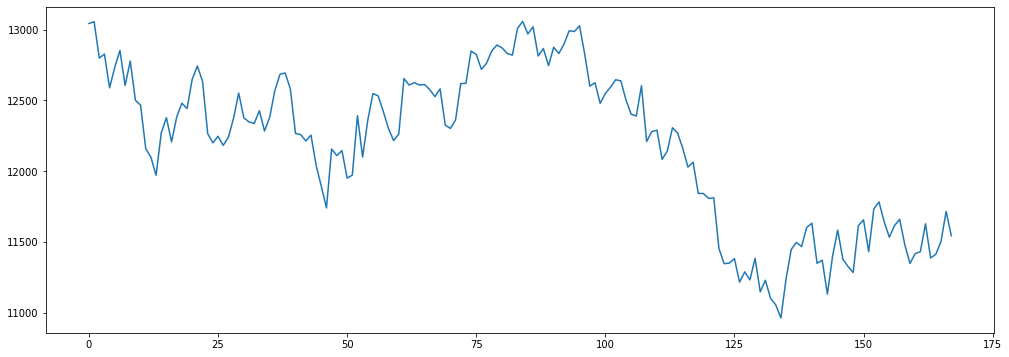

In [142]:
plt.figure(figsize = [17, 6]
          )

plt.plot(dow[ : , 5]
        )

#### Question 11-5. Now over-plot this plot with a `red dot` marker for every day where the dow volume was greater than 5.5 billion.

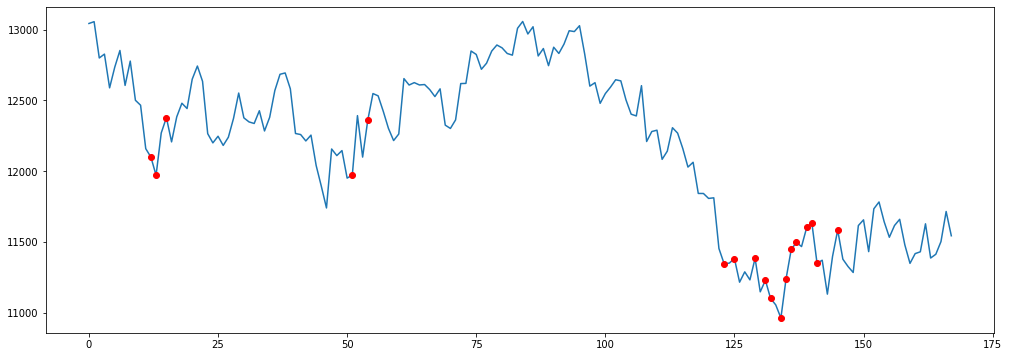

In [143]:
plt.figure(figsize = [17, 6]
          )

plt.plot(dow[ : , 5]
        )

plt.plot(where(masking)[0],
         dow[where(masking)[0], 5],
         "ro")

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>